# Hypothesis Testing in Exploratory Data Analysis (EDA): Correlations and Normality

Let's look at how we use hypothesis testing to investigate areas that we examined in Exploratory Data Analysis (EDA) lessons. Hypothesis testing enables us to statistically evaluate relationships between variables and scrutinize their distributions with a more analytical approach.

We'll start by applying hypothesis testing to relationships between variables, and then, we'll delve into examining distributions (specifically normality).

We'll use the housing price dataset. 

In [1]:
import pandas as pd

# Load the housing price dataset
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/housing_price_eda.csv")

# Correlation

During EDA, we often have certain presumptions about the data. For example, we might hypothesize that houses with larger 'LotArea' have higher 'SalePrice'. Hypothesis testing allows us to test these assumptions rigorously.

To statistically test the relationship, we use correlation tests like Pearson's correlation test. The **null hypothesis is that there is no relationship between the two variables.**

In [2]:
from scipy.stats import pearsonr

# Pearson's correlation test between 'LotArea' and 'SalePrice'
correlation_coef, p_value = pearsonr(df['LotArea'], df['SalePrice'])
print("Correlation Coefficient:", correlation_coef)
print("P-value:", p_value)

Correlation Coefficient: 0.26384335387140556
P-value: 1.1231391549186638e-24


## Interpreting the Results

1. **Correlation Coefficient (0.26)**: This value measures the strength and direction of the linear relationship between the two variables. It ranges from -1 to 1, where:
   - **-1** indicates a perfect negative linear correlation.
   - **0** indicates no linear correlation.
   - **1** indicates a perfect positive linear correlation.

   A coefficient of **0.26** suggests a weak positive linear relationship between 'LotArea' and 'SalePrice'. This means that as 'LotArea' increases, 'SalePrice' tends to increase as well, but the relationship is not very strong.

2. **P-value (1.12e-24)**: The p-value helps us determine the significance of our results. It tests the null hypothesis that there is no correlation between the two variables. 
   - A p-value less than 0.05 (common threshold for significance) indicates strong evidence against the null hypothesis, leading us to reject it.
   - A p-value greater than 0.05 suggests weak evidence against the null hypothesis, so we fail to reject it.

   In your case, the p-value is extremely small, far less than 0.05, which indicates very strong evidence against the null hypothesis. This means that the observed correlation between 'LotArea' and 'SalePrice' is statistically significant, and it's highly unlikely that this result is due to random chance.

**Conclusion**: There is a statistically significant, though weak, positive linear relationship between 'LotArea' and 'SalePrice' in your dataset.

**However, remember that correlation does not imply causation.**

# Normal Distribution

Many statistical techniques assume that data is normally distributed. Checking for normality and applying necessary transformations to make data more "normal" can be crucial for the success of these techniques. 

Applications of Normality Tests (or other ways of checking for normality):

1. **Assumption Testing**: Normality tests are employed to **assess the assumption of normality in various statistical techniques, such as t-tests, analysis of variance (ANOVA), linear regression, and others**. Violations of normality assumptions may require alternative approaches or data transformations.

2. **Data Exploration**: Normality tests help analysts understand the distributional properties of the data they are working with. This information can **guide the selection of appropriate statistical methods and provide insights into the nature of the variables**.

We'll be using the housing price datasets. Let's check the normality of the 'SalePrice',  'LotArea' and '1stFlrSF' columns and try a transformation if needed.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Checking if data is normally distributed

Checking for normality can be done both visually (using histograms and Q-Q plots) and statistically using tests like the Kolmogorov-Smirnov (K-S) test, Shapiro-Wilk test, among others.

**Visual Inspection:**
- **Histogram**: A bell-shaped curve in a histogram is indicative of a normal distribution.
- **Q-Q Plot**: In this plot, the quantiles of your data are plotted against the quantiles of a normal distribution. If the data is normally distributed, the points should roughly lie on the y=x line.
- **Box Plots**: The symmetry of a box plot can give hints about data normality.

**Statistical Tests:**

- **Shapiro-Wilk Test**: This is a popular test for normality. A low p-value (typically p<0.05) indicates that the data is not normally distributed.
- **Kolmogorov-Smirnov Test**: This test compares the cumulative distribution of your data to a normal distribution. Again, a low p-value suggests non-normality.

**Descriptive Statistics:**
- **Skewness and Kurtosis**: Skewness measures the asymmetry of the data distribution, while kurtosis measures the "tailedness". For a normal distribution, skewness should be close to 0 (indicating symmetry), and kurtosis should be close to 3. Should be used in conjunction with other methods.


### Histogram and Q-Q plot

We'll visualize the distribution using a histogram and also use a Q-Q plot, which plots the quantiles of our data against the quantiles of a normal distribution.

#### SalePrice

<Axes: xlabel='SalePrice', ylabel='Count'>

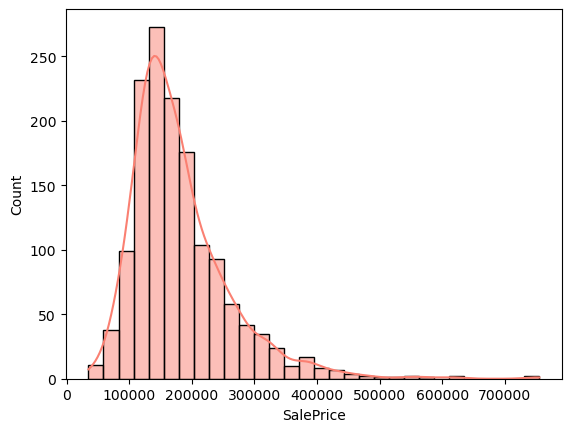

In [4]:
# Plotting histogram for 'SalePrice'
sns.histplot(df['SalePrice'], kde=True, bins=30, color="salmon")

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

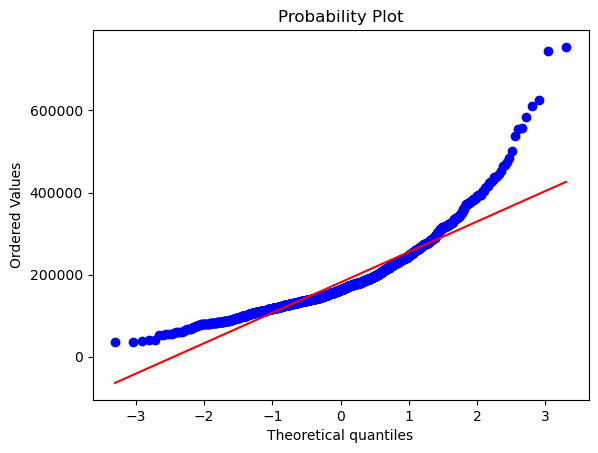

In [5]:
# Q-Q plot for 'SalePrice'
from scipy import stats

stats.probplot(df['SalePrice'], plot=plt)

#### LotArea

<Axes: xlabel='LotArea', ylabel='Count'>

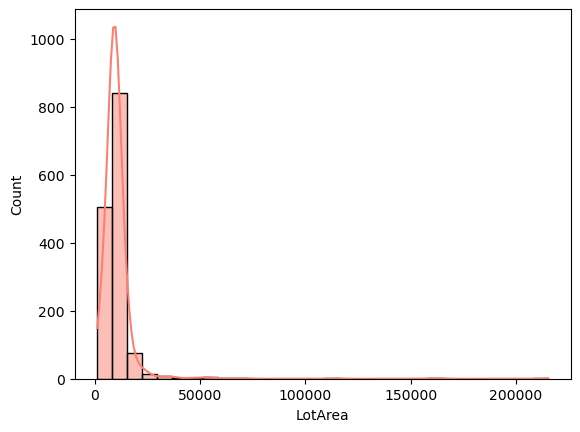

In [6]:
# Plotting histogram for 'LotArea'
sns.histplot(df['LotArea'], kde=True, bins=30, color="salmon")

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([  1300,   1477,   1491, ..., 159000, 164660, 215245], dtype=int64)),
 (5888.761357966363, 10516.828082191783, 0.589007650490991))

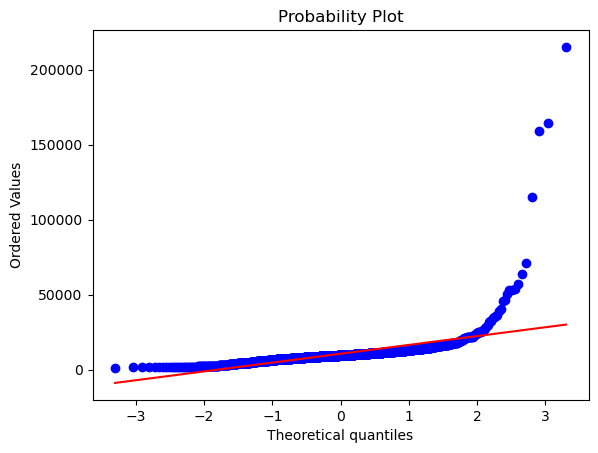

In [7]:
# Q-Q plot for 'LotArea'
from scipy import stats

stats.probplot(df['LotArea'], plot=plt)

#### 1stFlrSF

<Axes: xlabel='1stFlrSF', ylabel='Count'>

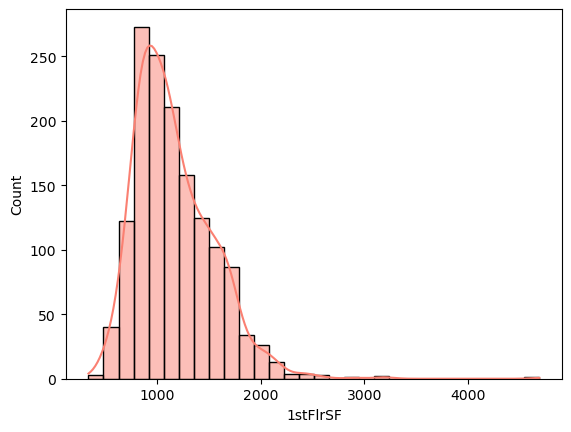

In [8]:
# Plotting histogram for '1stFlrSF'
sns.histplot(df['1stFlrSF'], kde=True, bins=30, color="salmon")

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 334,  372,  438, ..., 3138, 3228, 4692], dtype=int64)),
 (372.4844599243678, 1162.626712328767, 0.9619281806000769))

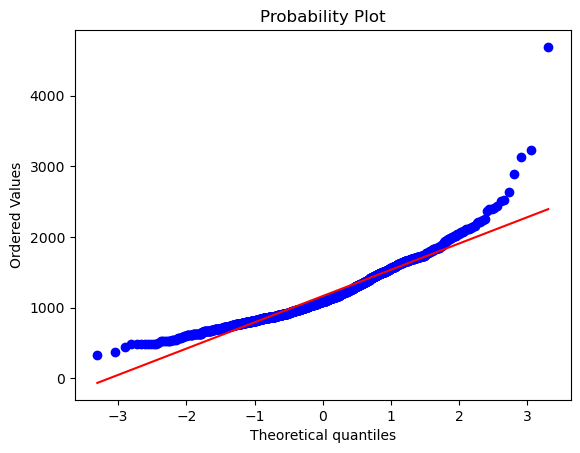

In [9]:
# Q-Q plot for 'SalePrice'
from scipy import stats

stats.probplot(df['1stFlrSF'], plot=plt)

### Hypothesis Testing

Perform hypothesis tests on variables like 'SalePrice', 'LotArea' and '1stFlrSF' to explore their distribution.

#### Kolmogorov-Smirnov (K-S) Test:
The K-S test is a non-parametric test that compares the cumulative distribution function of the sample data to that of a specified theoretical distribution (like the normal distribution). The null hypothesis of the test is that the sample data follows the specified distribution.

By conducting the Kolmogorov-Smirnov test, we can gain insights into the distributional properties of the variable and determine if it follows a normal distribution or not.

##### SalePrice

In [10]:
# Conducting the Kolmogorov-Smirnov test for normality on 'SalePrice'
# First, we need to standardize the data to have mean 0 and variance 1 since we're comparing against a standard normal distribution
standardized_saleprice = (df['SalePrice'] - df['SalePrice'].mean()) / df['SalePrice'].std()
ks_test_statistic, ks_p_value = stats.kstest(standardized_saleprice, 'norm')

ks_test_statistic, ks_p_value

(0.12368542719946385, 6.330230702928437e-20)

In [11]:
# print the test result
if ks_p_value < 0.05:
    print('The test results indicate that the distribution of prices is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of prices is not significantly different from a normal distribution.')

The test results indicate that the distribution of prices is significantly different from a normal distribution.


Interpretation:
The null hypothesis of the K-S test is that the data follows a specified distribution (in this case, the standard normal distribution). The obtained p-value is much smaller than typical significance levels (e.g., 0.05). Thus, based on the K-S test, we reject the null hypothesis and infer that the 'SalePrice' data does not follow a normal distribution.

##### LotArea

In [12]:
# Conducting the Kolmogorov-Smirnov test for normality on 'LotArea'
standardized_LotArea = (df['LotArea'] - df['LotArea'].mean()) / df['LotArea'].std()
ks_test_statistic, ks_p_value = stats.kstest(standardized_LotArea, 'norm')

ks_test_statistic, ks_p_value

# print the test result
if ks_p_value < 0.05:
    print('The test results indicate that the distribution of LotArea is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of LotArea is not significantly different from a normal distribution.')

The test results indicate that the distribution of LotArea is significantly different from a normal distribution.


##### 1stFlrSF

In [13]:
# Conducting the Kolmogorov-Smirnov test for normality on '1stFlrSF'
standardized_1stFlrSF = (df['1stFlrSF'] - df['1stFlrSF'].mean()) / df['1stFlrSF'].std()
ks_test_statistic, ks_p_value = stats.kstest(standardized_1stFlrSF, 'norm')

ks_test_statistic, ks_p_value

# print the test result
if ks_p_value < 0.05:
    print('The test results indicate that the distribution of 1stFlrSF is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of 1stFlrSF is not significantly different from a normal distribution.')

The test results indicate that the distribution of 1stFlrSF is significantly different from a normal distribution.


#### Shapiro-Wilk Test

The Shapiro-Wilk test is another popular method to check for normality. Its null hypothesis is that the data follows a normal distribution. The Shapiro-Wilk test is known to be more appropriate for smaller sample sizes compared to the K-S test.

We only need to perform one test, but we will show how the Shapiro-Wilk Test works anyways with SalePrice.

##### SalePrice

In [14]:
# Conducting the Shapiro-Wilk test for normality on 'SalePrice'
shapiro_test_statistic, shapiro_p_value = stats.shapiro(df['SalePrice'])

shapiro_test_statistic, shapiro_p_value

(0.8696714665902145, 3.2061412312021656e-33)

In [15]:
# print the test result
if shapiro_p_value < 0.05:
    print('The test results indicate that the distribution of prices is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of prices is not significantly different from a normal distribution.')

The test results indicate that the distribution of prices is significantly different from a normal distribution.


Interpretation:
The null hypothesis of the Shapiro-Wilk test is that the data follows a normal distribution. Here, the p-value is much smaller than a typical significance level (e.g., 0.05). Therefore, we reject the null hypothesis and conclude that the 'SalePrice' data does not follow a normal distribution.

In cases where normality is an assumption for further analysis, transformations or other techniques might be necessary to make the data more "normal".

Both the Shapiro-Wilk and K-S tests yielded similar conclusions regarding the non-normality of the 'SalePrice' data. In practice, it's beneficial to consider both visual (plots) and statistical (tests) methods to check for normality. If discrepancies arise between different methods, further investigations and considerations might be necessary.

## Transforming Data to Be Normally Distributed

Transforming data to be approximately normal can aid in statistical analysis and modeling. 

**Log Transformation:**
- Useful for data that shows exponential growth, like population or financial data.
- Use when data is right-skewed.

**Square Root Transformation:**
- Moderates the impact of extreme values.
- Suitable for data with mild skewness.

**Box-Cox Transformation:**
- Requires positive data values.
- Automatically determines the best power transformation.


#### Logaritmic Transformation

If the 'SalePrice' distribution seems non-normal, a common technique is to apply a logarithmic transformation to the data to make it more normal.

<Axes: xlabel='SalePrice', ylabel='Count'>

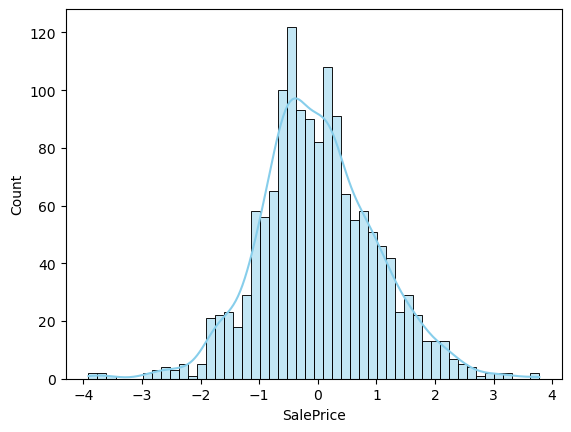

In [16]:
# Applying log transformation to 'SalePrice' and standardizing it
log_transformed_saleprice = np.log1p(df['SalePrice'])
standardized_log_saleprice = (log_transformed_saleprice - log_transformed_saleprice.mean()) / log_transformed_saleprice.std()

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_log_saleprice, kde=True, bins=50, color="skyblue")

#### Square Root Transformation

'1stFlrSF' could be a candidate for the Square Root transformation given its mild to moderate skewness.

Text(0.5, 1.0, 'Square Root Transformed 1stFlrSF')

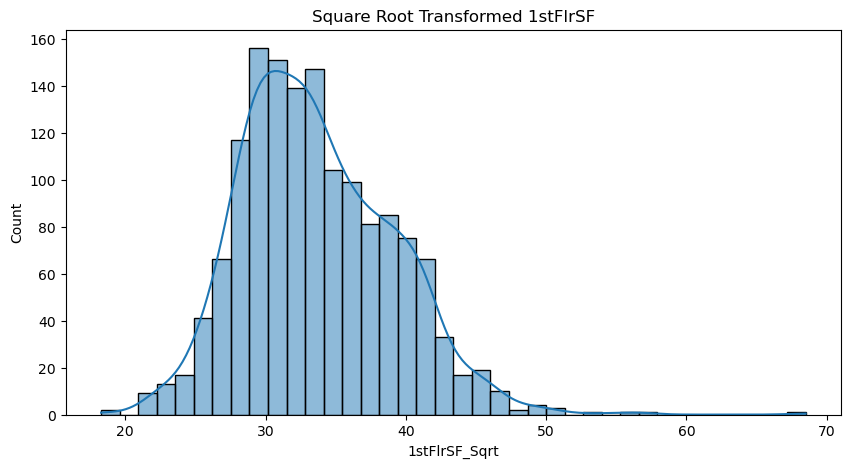

In [17]:
# Applying Square Root transformation to '1stFlrSF'
df['1stFlrSF_Sqrt'] = np.sqrt(df['1stFlrSF'])

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Square Root transformed '1stFlrSF'
sns.histplot(df['1stFlrSF_Sqrt'], kde=True)
plt.title('Square Root Transformed 1stFlrSF')

The Square Root transformed '1stFlrSF' appears more normally distributed, with its skewness moderated.

#### Box-Cox Transformation

'LotArea' seems like a good candidate for the Box-Cox transformation due to its high skewness and positive values.

Text(0.5, 1.0, 'Box-Cox Transformed LotArea')

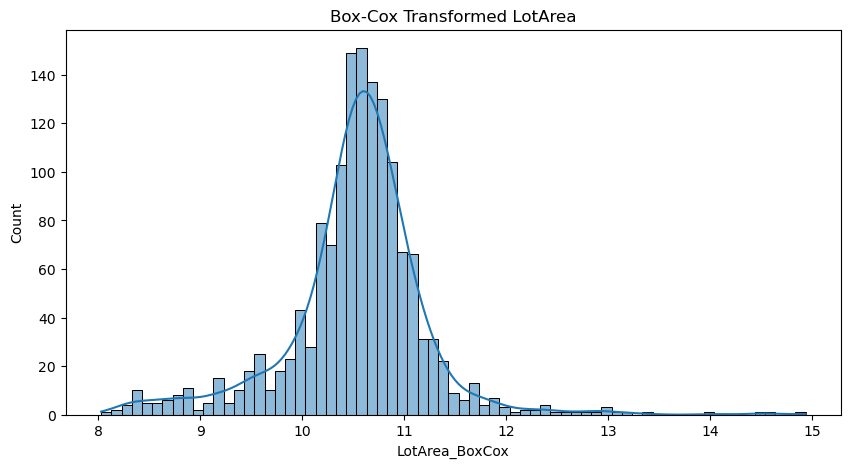

In [18]:
from scipy.stats import boxcox
import numpy as np

# Applying Box-Cox transformation to 'LotArea'
df['LotArea_BoxCox'], _ = boxcox(df['LotArea'])

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Box-Cox transformed 'LotArea'
sns.histplot(df['LotArea_BoxCox'], kde=True)
plt.title('Box-Cox Transformed LotArea')

The Box-Cox transformed 'LotArea' now looks much more normally distributed than before, with the extreme skewness greatly reduced.

## After Transformation

- **Re-assess Distribution:** After applying a transformation, visually assess the distribution again using histograms and Q-Q plots.
- **Statistical Testing:** Shapiro-Wilk or Kolmogorov-Smirnov tests can be used to statistically assess normality.
Remember to reverse transformations (when needed) for interpretation.

Always consider the underlying reasons for any non-normality, as transformations might not always be the best solution.

Let's do it just for SalePrice.

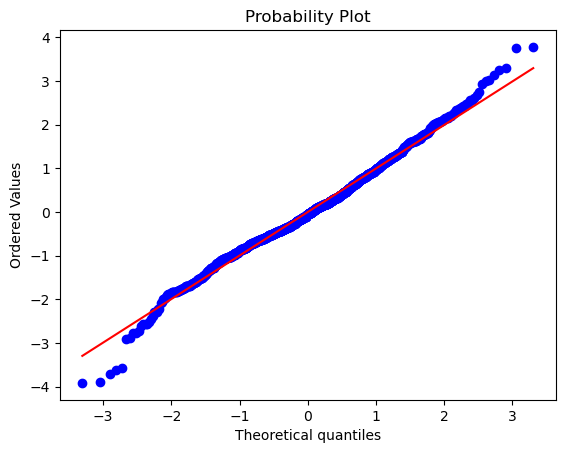

In [19]:
# Q-Q plot for transformed 'SalePrice'
stats.probplot(standardized_log_saleprice, plot=plt);

Let's also check with Kolmogorov-Smirnov (K-S) Test.

In [20]:
# Conducting the Kolmogorov-Smirnov test on the log-transformed and standardized 'SalePrice'
ks_test_statistic_after_transformation, ks_p_value_after_transformation = stats.kstest(standardized_log_saleprice, 'norm')

ks_test_statistic_after_transformation, ks_p_value_after_transformation

(0.04091043782245296, 0.014664698682115247)

In [21]:
# print the test result
if ks_p_value_after_transformation < 0.05:
    print('The test results indicate that the distribution of prices is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of prices is not significantly different from a normal distribution.')

The test results indicate that the distribution of prices is significantly different from a normal distribution.


### Insights
The initial histograms and Q-Q plots can help assess the skewness and kurtosis of the 'SalePrice' distribution. If the data is not following the line in the Q-Q plot well, it indicates deviations from normality. After the logarithmic transformation, the histogram and Q-Q plot should ideally show a distribution closer to normal. If the transformed data lies closer to the line in the Q-Q plot, it suggests that the log transformation was successful in making the data more normally distributed.

After applying the logarithmic transformation to the 'SalePrice' data and subsequently standardizing it, we conducted the K-S test again. The p-value is 0.0147, which is still less than a typical significance level (e.g., 0.05). Therefore, we would reject the null hypothesis of the K-S test, which suggests that the log-transformed 'SalePrice' data does not perfectly follow a standard normal distribution.

However, it's important to note that the p-value after transformation is notably larger than before the transformation, implying that the log transformation brought the distribution closer to normality. Furthermore, in practical applications, achieving a "perfectly normal" distribution isn't always necessary. The goal is often to get "close enough" to normality to meet the assumptions of specific statistical methods.

Given this result, one might deem the log transformation as beneficial and sufficient for many analytical methods that assume normality.

## 💡 Check for understanding

- Do the after transformation checks for `LotArea` and `1stFlrSF`
- Choose another numerical continuous variable from the dataset and check if it's normally distributed. If it's not, try transforming it so it becomes normally distributed, and check for normality again. Explain why you chose that variable and your results.

<Axes: xlabel='LotArea', ylabel='Count'>

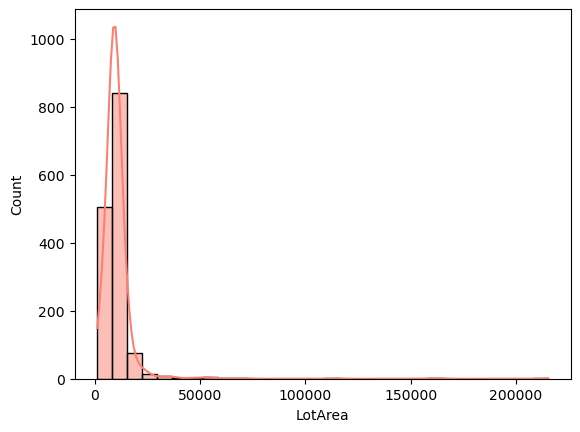

In [22]:

sns.histplot(df['LotArea'], kde=True, bins=30, color="salmon")

<Axes: xlabel='1stFlrSF', ylabel='Count'>

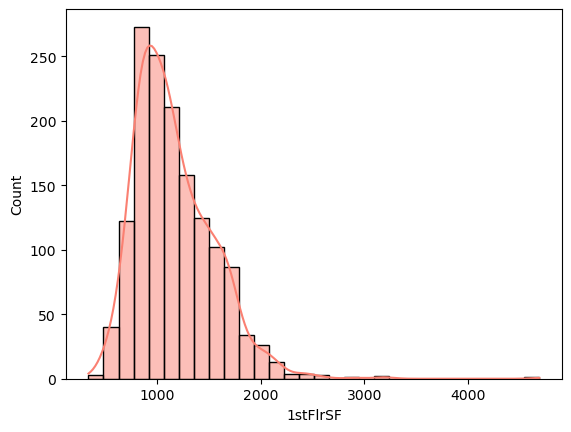

In [23]:
sns.histplot(df['1stFlrSF'], kde=True, bins=30, color="salmon")

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([  1300,   1477,   1491, ..., 159000, 164660, 215245], dtype=int64)),
 (5888.761357966363, 10516.828082191783, 0.589007650490991))

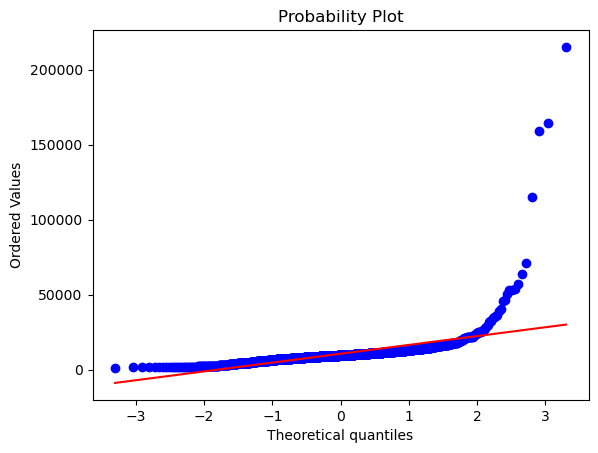

In [24]:
stats.probplot(df['LotArea'], plot=plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 334,  372,  438, ..., 3138, 3228, 4692], dtype=int64)),
 (372.4844599243678, 1162.626712328767, 0.9619281806000769))

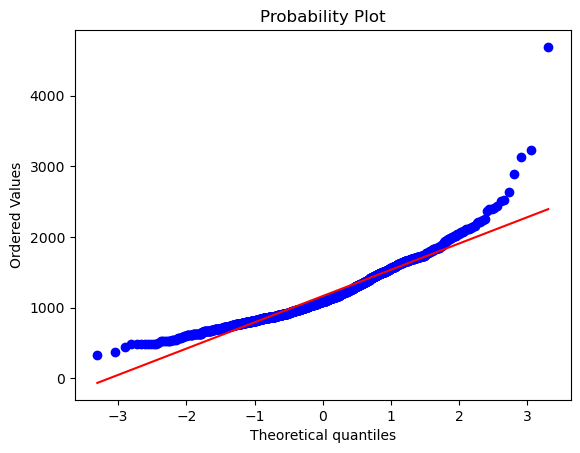

In [25]:
stats.probplot(df['1stFlrSF'], plot=plt)

In [26]:
standardized_saleprice = (df['LotArea'] - df['LotArea'].mean()) / df['LotArea'].std()
ks_test_statistic, ks_p_value = stats.kstest(standardized_saleprice, 'norm')

ks_test_statistic, ks_p_value

(0.25151649472952164, 7.056901032866482e-82)

In [27]:
# Conducting the Shapiro-Wilk test for normality on 'SalePrice'
shapiro_test_statistic, shapiro_p_value = stats.shapiro(df['LotArea'])

shapiro_test_statistic, shapiro_p_value

(0.3510588565706664, 7.933653820088432e-58)

Text(0.5, 1.0, 'Square Root Transformed LotArea')

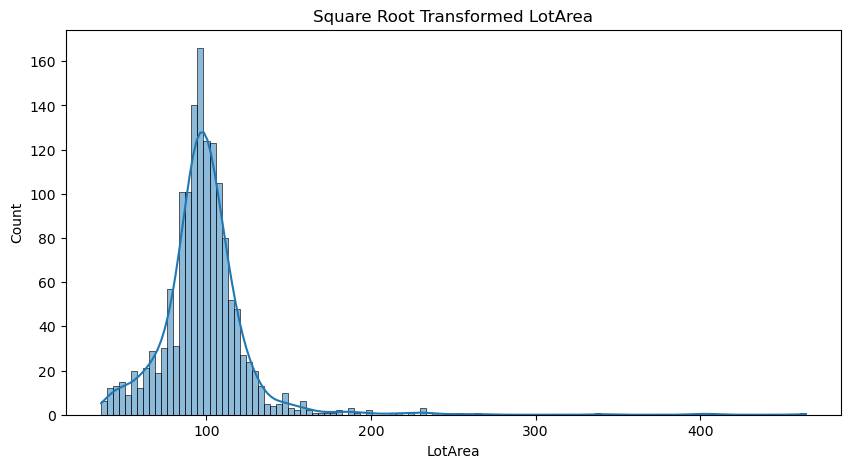

In [28]:
# Applying Square Root transformation to '1stFlrSF'
df['LotArea'] = np.sqrt(df['LotArea'])

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Square Root transformed '1stFlrSF'
sns.histplot(df['LotArea'], kde=True)
plt.title('Square Root Transformed LotArea')

<Axes: xlabel='LotArea', ylabel='Count'>

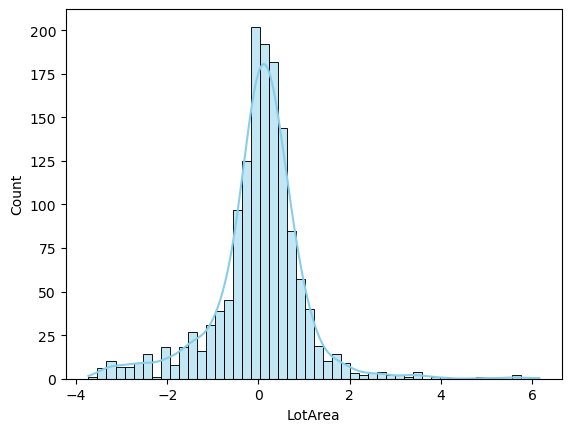

In [29]:
# Applying log transformation to 'SalePrice' and standardizing it
log_transformed_saleprice = np.log1p(df['LotArea'])
standardized_log_saleprice = (log_transformed_saleprice - log_transformed_saleprice.mean()) / log_transformed_saleprice.std()

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_log_saleprice, kde=True, bins=50, color="skyblue")

<Axes: xlabel='1stFlrSF', ylabel='Count'>

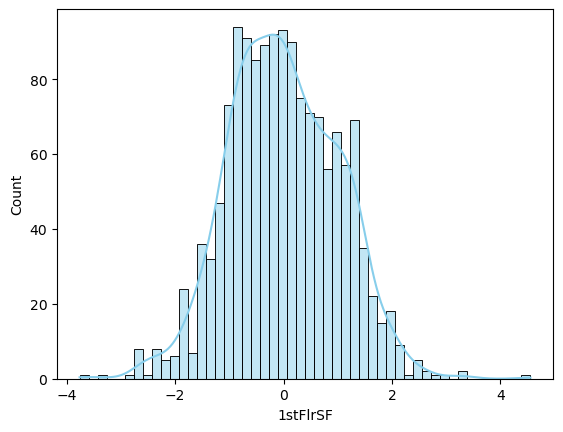

In [30]:
# Applying log transformation to 'SalePrice' and standardizing it
log_transformed_saleprice = np.log1p(df['1stFlrSF'])
standardized_log_saleprice = (log_transformed_saleprice - log_transformed_saleprice.mean()) / log_transformed_saleprice.std()

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_log_saleprice, kde=True, bins=50, color="skyblue")

In [31]:
display(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,1stFlrSF_Sqrt,LotArea_BoxCox
0,1,60,RL,65.0,91.923882,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,29.257478,10.433680
1,2,20,RL,80.0,97.979590,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,35.524639,10.602809
2,3,60,RL,68.0,106.066017,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,30.331502,10.813973
3,4,70,RL,60.0,97.724101,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,31.000000,10.595874
4,5,60,RL,84.0,119.415242,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,33.837849,11.131570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,88.977525,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,175000,30.870698,10.347575
1456,1457,20,RL,85.0,114.782403,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,45.530210,11.025302
1457,1458,70,RL,66.0,95.089432,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,34.467376,10.523352
1458,1459,20,RL,68.0,98.574845,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,142125,32.832910,10.618901


## Note: Central Limit Theorem

The CLT states that, regardless of the shape of the underlying population, the sampling distribution of the mean will approximate a normal distribution as the sample size grows larger (n > 30), assuming all samples are identical in size and are randomly sampled. 

1. **Large Sample Size & Individual Data Points**: Even with a large sample, the distribution of individual data points could still be non-normal. For instance, a dataset with millions of data points could still be heavily skewed or have extreme kurtosis.
  
2. **Large Sample Size & Averages of Samples**: If you're taking multiple samples from a population and calculating their averages, the distribution of those averages tends to be normal due to the CLT, even if the underlying population is not normal.

3. **Practical Implications**: While the CLT is powerful, remember that many statistical tests and methods assume that the individual data points (not their means) are normally distributed. So, you can't bypass these assumptions simply because you have a large dataset.